### Sentiment Analysis - Scenarios 1 and 2

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('draft_sentiment_scores_busts4.csv')
df.head()

,PERSON_ID,PLAYER_NAME,SEASON,ROUND_NUMBER,ROUND_PICK,OVERALL_PICK,DRAFT_TYPE,TEAM_ID,TEAM_CITY,TEAM_NAME,...,Outlook_Preprocessed,Perf,DraftX,Bscore,Ascore,Bust,Bust2,Bust3,Bust4,Weaknesses_Preprossed_Compound
0,1630224,Jalen Green,2021,1,2,2,Draft,1610612745,Houston,Rockets,...,forgoing college play nba gleagues pathway pro...,58.549650,1.05,61.477133,0.155273175,TBD,TBD,TBD,Y,0.9979
1,1629628,RJ Barrett,2019,1,3,3,Draft,1610612752,New York,Knicks,...,incoming duke freshman head top recruiting cla...,59.833210,1.10,65.816531,0.162913791,N,N,N,Y,0.9977
2,1628963,Marvin Bagley III,2018,1,2,2,Draft,1610612758,Sacramento,Kings,...,duke freshman earned mvp le schwab invitationa...,47.007812,1.05,49.358203,0.686888832,N,Y,MID,N,0.9973
3,1630164,James Wiseman,2020,1,2,2,Draft,1610612744,Golden State,Warriors,...,outlook incoming memphis freshman 2019 morgan ...,38.192248,1.05,40.101860,0.350270053,TBD,TBD,TBD,N,0.9967
4,1628398,Kyle Kuzma,2017,1,27,27,Draft,1610612751,Brooklyn,Nets,...,NaN,57.246305,2.30,131.666503,0.385357081,N,N,N,N,0.9964


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERSON_ID                       1042 non-null   int64  
 1   PLAYER_NAME                     1042 non-null   object 
 2   SEASON                          1042 non-null   int64  
 3   ROUND_NUMBER                    1042 non-null   int64  
 4   ROUND_PICK                      1042 non-null   int64  
 5   OVERALL_PICK                    1042 non-null   int64  
 6   DRAFT_TYPE                      1042 non-null   object 
 7   TEAM_ID                         1042 non-null   int64  
 8   TEAM_CITY                       1042 non-null   object 
 9   TEAM_NAME                       1042 non-null   object 
 10  TEAM_ABBREVIATION               1042 non-null   object 
 11  ORGANIZATION                    1040 non-null   object 
 12  ORGANIZATION_TYPE               10

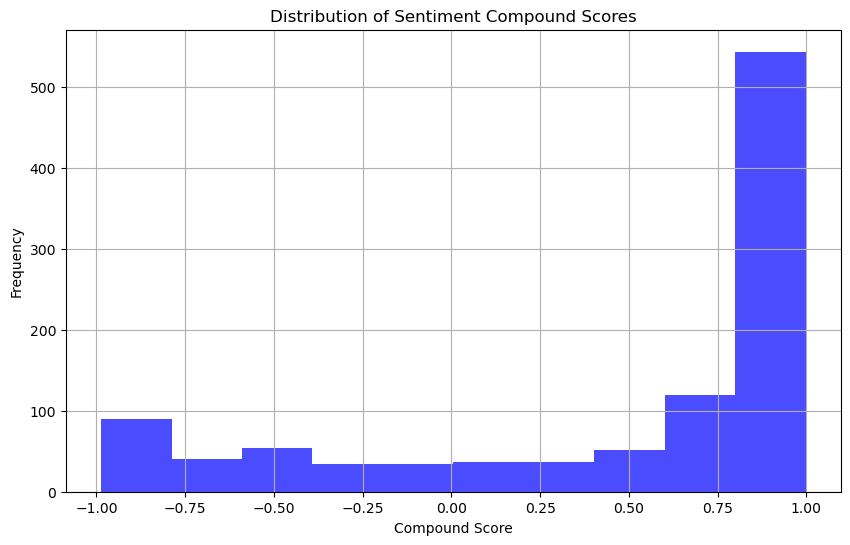

In [9]:
import matplotlib.pyplot as plt

# Filter out rows with NaN values in the compound scores
df_filtered = df.dropna(subset=['Weaknesses_Preprossed_Compound'])

# Create a histogram of the compound scores
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Weaknesses_Preprossed_Compound'], bins=10, color='blue', alpha=0.7)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Compound Scores')
plt.grid(True)
plt.show()


In [10]:
print(df.columns)

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG', 'First Name', 'Last Name', 'Suffix1', 'Suffix2',
       'Overall', 'NBA Comparison', 'Strengths', 'Weaknesses', 'Outlook',
       'Notes', 'OverTxt', 'Has_Page', 'PER', 'WS_48', 'VORP',
       'Strengths_Preprocessed', 'Weaknesses_Preprocessed',
       'Outlook_Preprocessed', 'Perf', 'DraftX', 'Bscore', 'Ascore', 'Bust',
       'Bust2', 'Bust3', 'Bust4', 'Weaknesses_Preprossed_Compound'],
      dtype='object')


In [15]:
import pandas as pd

# Get the top 5 most positive scores
top_positive_scores = df.nlargest(10, 'Weaknesses_Preprossed_Compound')

# Get the top 5 most negative scores
top_negative_scores = df.nsmallest(10, 'Weaknesses_Preprossed_Compound')

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprossed_Compound']
top_positive_scores = top_positive_scores.dropna(subset=columns_to_check)
top_negative_scores = top_negative_scores.dropna(subset=columns_to_check)

# Print the top 5 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 5 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Bust2','Weaknesses_Preprocessed', 'Weaknesses_Preprossed_Compound']])

# Print the top 5 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 5 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME', 'Bust2', 'Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']])


Top 5 Most Positive Scores:
         PLAYER_NAME Bust2                            Weaknesses_Preprocessed  \
0        Jalen Green   TBD  green good shooter yet sniper beyond arc still...   
1         RJ Barrett     N  may peaked degree high school clearly top kid ...   
2  Marvin Bagley III     Y  lack wingspan big men class continue fill fram...   
3      James Wiseman   TBD  obvious elephant room go draft played minute c...   
4         Kyle Kuzma     N  kuzma show great deal talent skill still need ...   
5     Chase Budinger     N  strong oneonone player area game focus end flo...   
6     Charles Bassey   TBD  need work shooting range consistency hesitates...   
7      Victor Claver     Y  need add strength although he tough doesnt see...   
8       Johnny Davis   TBD  asked goto scorer last season necessity aggres...   
9       Tyrese Maxey   TBD  struggled efficiencyconsistency freshman kentu...   

   Weaknesses_Preprossed_Compound  
0                          0.9979  
1       

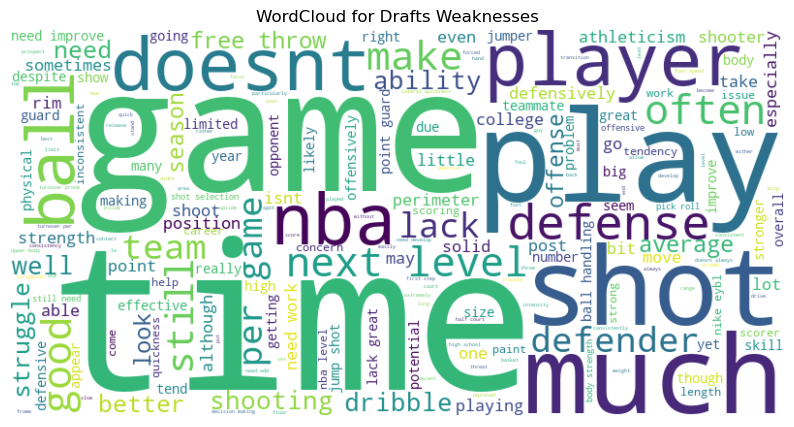

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine strengths and weaknesses text
combined_text = df['Weaknesses_Preprocessed'].str.cat(sep=' ')

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Drafts Weaknesses')
plt.show()


In [21]:
import pandas as pd

# Drop rows with NaN values in the specified columns
columns_to_check = ['Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']
df = df.dropna(subset=columns_to_check)

# Get the top 10 most positive scores
top_positive_scores = df.nlargest(10, 'Weaknesses_Preprossed_Compound')

# Get the top 10 most negative scores
top_negative_scores = df.nsmallest(10, 'Weaknesses_Preprossed_Compound')

# Print the top 10 most positive scores with PLAYER_NAME and Bust2 column values
print("Top 10 Most Positive Scores:")
print(top_positive_scores[['PLAYER_NAME', 'Bust2', 'Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']])

# Print the top 10 most negative scores with PLAYER_NAME and Bust2 column values
print("\nTop 10 Most Negative Scores:")
print(top_negative_scores[['PLAYER_NAME', 'Bust2','Weaknesses_Preprocessed','Weaknesses_Preprossed_Compound']])

# Filter out rows with NaN values in the compound scores
df_filtered = df.dropna(subset=['Weaknesses_Preprossed_Compound'])

# Count the number of occurrences for each sentiment category
sentiment_counts = {
    'Positive': sum(df_filtered['Weaknesses_Preprossed_Compound'] > 0.6),
    'Neutral': sum((df_filtered['Weaknesses_Preprossed_Compound'] >= 0.001) & 
                   (df_filtered['Weaknesses_Preprossed_Compound'] <= 0.599)),
    'Negative': sum(df_filtered['Weaknesses_Preprossed_Compound'] < -0.01)
}

# Print the distribution of sentiment categories
print("\nSentiment Distribution:")
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment}: {count}")


Top 10 Most Positive Scores:
         PLAYER_NAME Bust2                            Weaknesses_Preprocessed  \
0        Jalen Green   TBD  green good shooter yet sniper beyond arc still...   
1         RJ Barrett     N  may peaked degree high school clearly top kid ...   
2  Marvin Bagley III     Y  lack wingspan big men class continue fill fram...   
3      James Wiseman   TBD  obvious elephant room go draft played minute c...   
4         Kyle Kuzma     N  kuzma show great deal talent skill still need ...   
5     Chase Budinger     N  strong oneonone player area game focus end flo...   
6     Charles Bassey   TBD  need work shooting range consistency hesitates...   
7      Victor Claver     Y  need add strength although he tough doesnt see...   
8       Johnny Davis   TBD  asked goto scorer last season necessity aggres...   
9       Tyrese Maxey   TBD  struggled efficiencyconsistency freshman kentu...   

   Weaknesses_Preprossed_Compound  
0                          0.9979  
1      

C:\Users\sinti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sinti\AppData\Local\Temp\ipykernel_12624\4096249205.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


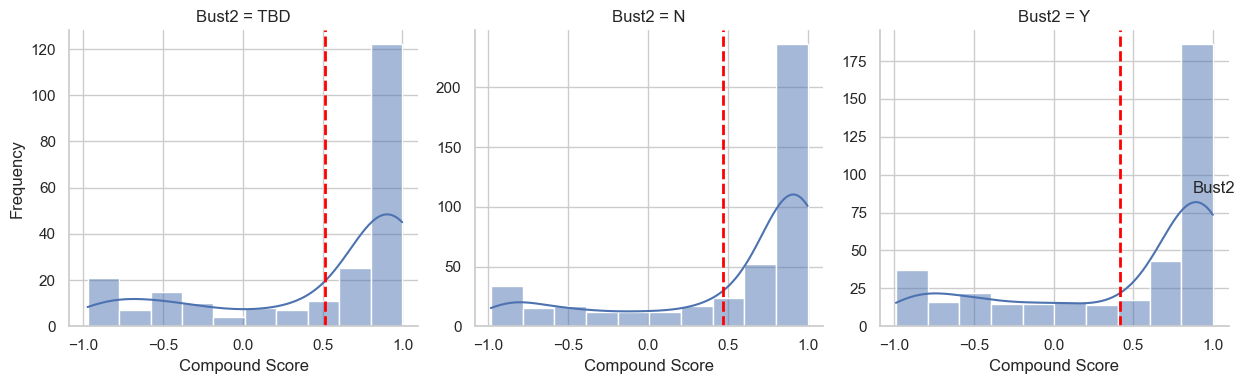

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df['Sentiment_Score'] = df['Weaknesses_Preprossed_Compound']

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a facet grid of subplots for each 'Bust2' category
g = sns.FacetGrid(df, col='Bust2', col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.histplot, x='Sentiment_Score', bins=10, kde=True)
g.set_axis_labels('Compound Score', 'Frequency')
g.set_titles("Bust2 = {col_name}")
g.add_legend(title='Bust2')

# Calculate average scores for each Bust2 category
average_scores = df.groupby('Bust2')['Sentiment_Score'].mean()

# Draw average score lines on each subplot
for ax, avg_score in zip(g.axes.flat, average_scores):
    ax.axvline(avg_score, color='red', linestyle='dashed', linewidth=2)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()


The blue line you are seeing in the histograms is most likely the Kernel Density Estimate (KDE) curve. KDE is a non-parametric way to estimate the probability density function of a random variable. It is often used in histograms to provide a smoothed representation of the data distribution.

The KDE curve gives you an idea of how the data is distributed along the x-axis (compound score) and provides insights into the underlying shape of the distribution. It helps you identify potential modes, peaks, and variations in the data distribution that might not be apparent in a simple histogram.

So, in the context of your histogram plots, the blue line is the KDE curve that represents the estimated distribution of compound scores for each 'Bust2' category. The bars of the histogram show the actual frequency counts in each bin, while the KDE curve provides a smoothed visual representation of the data's probability density.

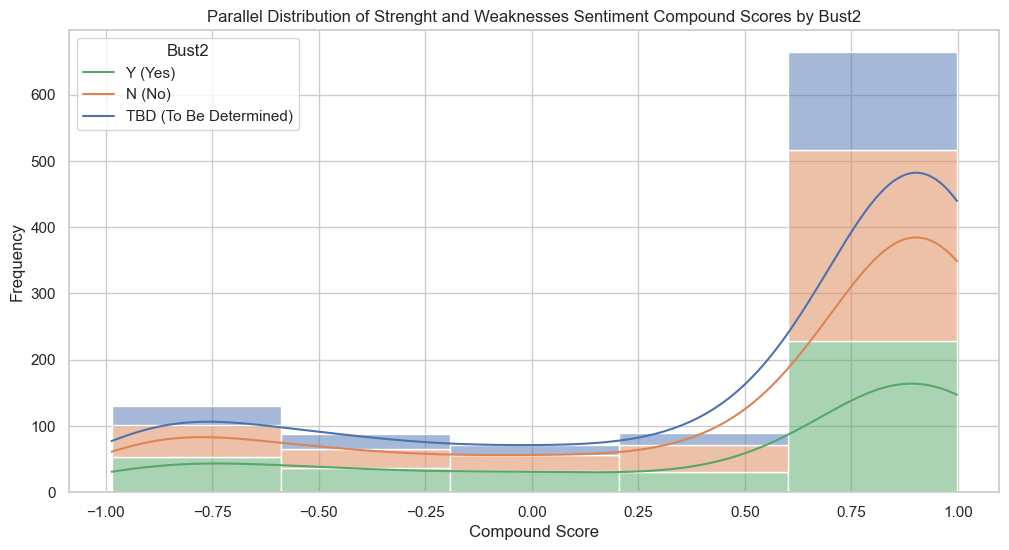

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Set the style of seaborn
sns.set(style="whitegrid")

# Create a parallel distribution plot of scores and Bust2 players using seaborn
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sentiment_Score', hue='Bust2', multiple='stack', bins=5, kde=True)
plt.xlabel('Compound Score')
plt.ylabel('Frequency')
plt.title('Parallel Distribution of Strenght and Weaknesses Sentiment Compound Scores by Bust2')
plt.legend(title='Bust2', labels=['Y (Yes)', 'N (No)', 'TBD (To Be Determined)'])
plt.show()

### Performing Sentiment on Weaknesses only

In [11]:
df.columns

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG', 'First Name', 'Last Name', 'Suffix1', 'Suffix2',
       'Overall', 'NBA Comparison', 'Strengths', 'Weaknesses', 'Outlook',
       'Notes', 'OverTxt', 'Has_Page', 'PER', 'WS_48', 'VORP',
       'Strengths_Preprocessed', 'Weaknesses_Preprocessed',
       'Outlook_Preprocessed', 'Perf', 'DraftX', 'Bscore', 'Bust', 'Bust2',
       'Bust3', 'Weaknesses_Compound', 'Sentiment_Score'],
      dtype='object')

In [33]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042 entries, 0 to 1041
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERSON_ID                       1042 non-null   int64  
 1   PLAYER_NAME                     1042 non-null   object 
 2   SEASON                          1042 non-null   int64  
 3   ROUND_NUMBER                    1042 non-null   int64  
 4   ROUND_PICK                      1042 non-null   int64  
 5   OVERALL_PICK                    1042 non-null   int64  
 6   DRAFT_TYPE                      1042 non-null   object 
 7   TEAM_ID                         1042 non-null   int64  
 8   TEAM_CITY                       1042 non-null   object 
 9   TEAM_NAME                       1042 non-null   object 
 10  TEAM_ABBREVIATION               1042 non-null   object 
 11  ORGANIZATION                    1040 non-null   object 
 12  ORGANIZATION_TYPE               10

In [24]:
import pandas as pd

# Assume df_filtered is your DataFrame with the sentiment scores and other data
# sentiment_counts is the dictionary with counts for each sentiment category

def label_sentiments(score):
    if score < -0.01:
        return 1  # Negative
    elif score > 0.6:
        return 2   # Positive
    else:
        return 0   # Neutral

# Create a new column 'Sentiment_Label' using the label_sentiments function
df_filtered['Sentiment_Label'] = df_filtered['Weaknesses_Preprossed_Compound'].apply(label_sentiments)

# Count the number of occurrences for each sentiment label category
sentiment_label_counts = df_filtered['Sentiment_Label'].value_counts()

print("Sentiment Label Counts:")
print(sentiment_label_counts)


Sentiment Label Counts:
Sentiment_Label
2    664
1    247
0    131
Name: count, dtype: int64


In [30]:
df_filtered['Sentiment_Label'].unique()

array([2, 0, 1], dtype=int64)

### Random Forest Using Entire Dataset


Sentiment Classification Model Accuracy: 0.6507177033492823
Fold 1 Accuracy: 0.6438848920863309
Fold 2 Accuracy: 0.6402877697841727
Fold 3 Accuracy: 0.6570397111913358


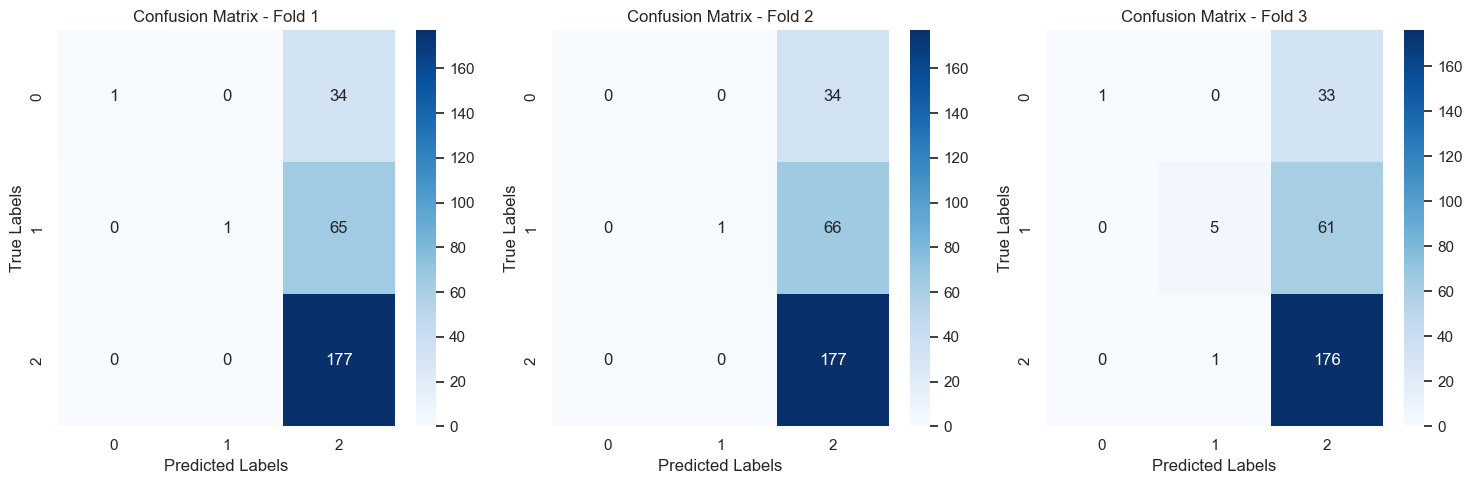

In [27]:

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

df_sentiment = df_filtered

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = rf_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold
    rf_model_fold = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = rf_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import classification_report

# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1', 'Label2'])

# Print the classification report
print(report)


              precision    recall  f1-score   support

      Label0       1.00      0.03      0.06        34
      Label1       0.83      0.08      0.14        66
      Label2       0.65      0.99      0.79       177

    accuracy                           0.66       277
   macro avg       0.83      0.37      0.33       277
weighted avg       0.74      0.66      0.54       277



In [47]:
newdf = pd.read_excel('Sentiment_Sample_v4.xlsx')
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               570 non-null    int64  
 1   PERSON_ID                570 non-null    int64  
 2   PLAYER_NAME              570 non-null    object 
 3   SEASON                   570 non-null    int64  
 4   ROUND_NUMBER             570 non-null    int64  
 5   ROUND_PICK               570 non-null    int64  
 6   OVERALL_PICK             570 non-null    int64  
 7   DRAFT_TYPE               570 non-null    object 
 8   TEAM_ID                  570 non-null    int64  
 9   TEAM_CITY                570 non-null    object 
 10  TEAM_NAME                570 non-null    object 
 11  TEAM_ABBREVIATION        570 non-null    object 
 12  ORGANIZATION             569 non-null    object 
 13  ORGANIZATION_TYPE        569 non-null    object 
 14  PLAYER_PROFILE_FLAG      5

### Random Forest Using Sample Dataset 570 rows

In [48]:
#create a new column 'Sentiment_Label' using the label_sentiments function
newdf['Sentiment_Label'] = newdf['Weaknesses_Compound'].apply(label_sentiments)

# Count the number of occurrences for each sentiment label category
sentiment_label_counts = newdf['Sentiment_Label'].value_counts()

print("Sentiment Label Counts:")
print(sentiment_label_counts)

Sentiment Label Counts:
Sentiment_Label
2    220
1    220
0    130
Name: count, dtype: int64



Sentiment Classification Model Accuracy: 0.5175438596491229
Fold 1 Accuracy: 0.4407894736842105
Fold 2 Accuracy: 0.4605263157894737
Fold 3 Accuracy: 0.4605263157894737


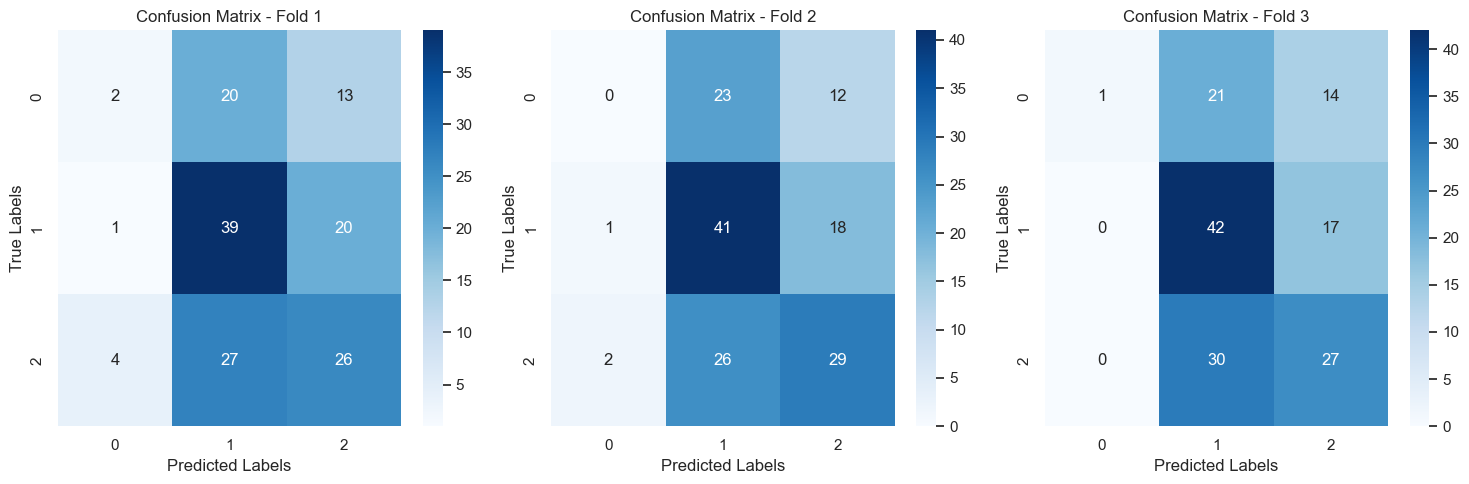

In [49]:
#using entire dataset containing the "weaknesses analysis"

df_sentiment = newdf

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Weaknesses_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = rf_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold
    rf_model_fold = RandomForestClassifier(n_estimators=200, random_state=42)
    rf_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = rf_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
        
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[fold - 1])
    axes[fold - 1].set_title(f"Confusion Matrix - Fold {fold}")
    axes[fold - 1].set_xlabel("Predicted Labels")
    axes[fold - 1].set_ylabel("True Labels")

# Adjust spacing and display the subplots
plt.tight_layout()
plt.show()


In [50]:
# Assuming y_val_fold and y_val_pred are your true labels and predicted labels for a fold
report = classification_report(y_val_fold, y_val_pred, target_names=['Label0', 'Label1', 'Label2'])

# Print the classification report
print(report)

              precision    recall  f1-score   support

      Label0       1.00      0.03      0.05        36
      Label1       0.45      0.71      0.55        59
      Label2       0.47      0.47      0.47        57

    accuracy                           0.46       152
   macro avg       0.64      0.40      0.36       152
weighted avg       0.59      0.46      0.40       152



### Random Forest Using Combined Strenghts and Weakenesses Player Reviews

In [76]:
data = pd.read_csv('draft_sentiment_scores_comb_2.csv')
data.columns

Index(['PERSON_ID', 'PLAYER_NAME', 'SEASON', 'ROUND_NUMBER', 'ROUND_PICK',
       'OVERALL_PICK', 'DRAFT_TYPE', 'TEAM_ID', 'TEAM_CITY', 'TEAM_NAME',
       'TEAM_ABBREVIATION', 'ORGANIZATION', 'ORGANIZATION_TYPE',
       'PLAYER_PROFILE_FLAG', 'First Name', 'Last Name', 'Suffix1', 'Suffix2',
       'Overall', 'NBA Comparison', 'Strengths', 'Weaknesses', 'Outlook',
       'Notes', 'OverTxt', 'Has_Page', 'PER', 'WS_48', 'VORP',
       'Strengths_Preprocessed', 'Weaknesses_Preprocessed',
       'Outlook_Preprocessed', 'Perf', 'DraftX', 'Bscore', 'Bust', 'Bust2',
       'Bust3', 'Strengths_Weaknesses_Combined',
       'Strengths_Weaknesses_Combined_Preprocessed',
       'Strengths_Weaknesses_Combined_Compound'],
      dtype='object')

In [77]:
# Load the dataset
data = pd.read_csv('draft_sentiment_scores_comb_2.csv')

# Define the label_sentiments function
def label_sentiments(score):
    if score < -0.01:
        return 1  # Negative
    elif score > 0.6:
        return 2   # Positive
    else:
        return 0   # Neutral

# Drop rows with NaN values in specified columns
columns_to_check = ['Strengths_Weaknesses_Combined_Preprocessed']
data.dropna(subset=columns_to_check, inplace=True)

# Create a new column 'Sentiment_Label' using the label_sentiments function
data['Sentiment_Label'] = data['Strengths_Weaknesses_Combined_Compound'].apply(label_sentiments)

# Count the number of occurrences for each sentiment label category
sentiment_label_counts = data['Sentiment_Label'].value_counts()

print("Sentiment Label Counts:")
print(sentiment_label_counts)


Sentiment Label Counts:
2    1029
0      14
1       4
Name: Sentiment_Label, dtype: int64



Sentiment Classification Model Accuracy: 0.9904761904761905
Fold 1 Accuracy: 0.982078853046595


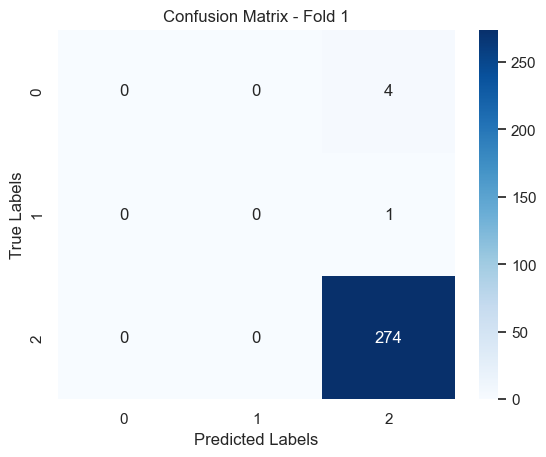

Fold 2 Accuracy: 0.982078853046595


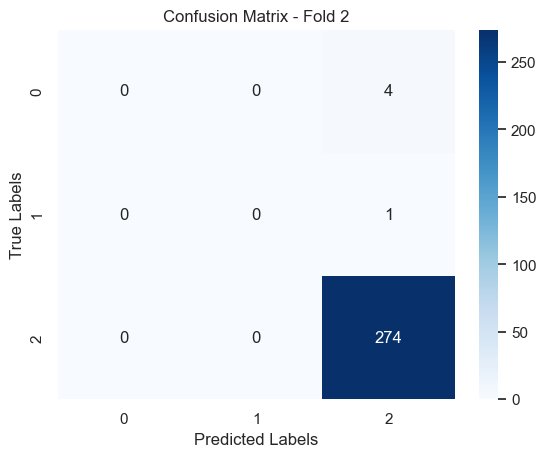

Fold 3 Accuracy: 0.978494623655914


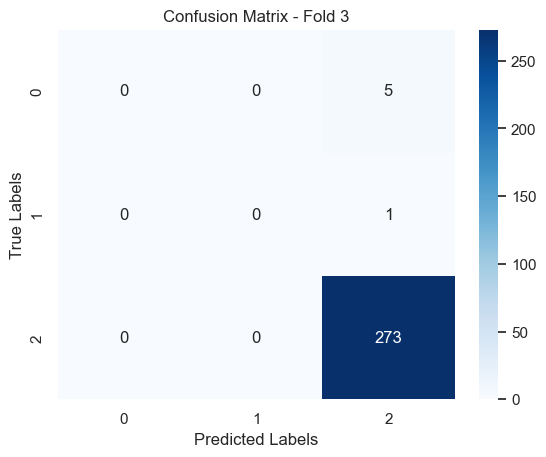

In [79]:
#using dataset that combines the strengths and weakenesses columns

df_sentiment = data

# Preprocess the data using the updated preprocess_text function
df_sentiment['Strengths_Weaknesses_Combined_Preprocessed'].apply(preprocess_text)

# Train-test split for sentiment classification dataset
X_sentiment = df_sentiment['Strengths_Weaknesses_Combined_Preprocessed']
y_sentiment = df_sentiment['Sentiment_Label']
X_sentiment_train, X_sentiment_test, y_sentiment_train, y_sentiment_test = train_test_split(
    X_sentiment, y_sentiment, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_sentiment_train)

# Transform test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_sentiment_test)

# Create the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the Random Forest model on the training data
rf_model.fit(X_train_tfidf, y_sentiment_train)

# Predict sentiment labels on the test data
y_sentiment_pred = rf_model.predict(X_test_tfidf)

# Evaluate sentiment classification model
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print("\nSentiment Classification Model Accuracy:", sentiment_accuracy)

# Cross-validation with confusion matrix plotting
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(cv.split(X_sentiment_train, y_sentiment_train), 1):
    X_train_fold, X_val_fold = X_sentiment_train.iloc[train_index], X_sentiment_train.iloc[val_index]
    y_train_fold, y_val_fold = y_sentiment_train.iloc[train_index], y_sentiment_train.iloc[val_index]
    
    # Transform training data for the fold
    X_train_fold_tfidf = tfidf_vectorizer.transform(X_train_fold)
    
    # Create and fit the model for the fold
    rf_model_fold = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model_fold.fit(X_train_fold_tfidf, y_train_fold)
    
    # Predict sentiment labels on the validation data
    y_val_pred = rf_model_fold.predict(tfidf_vectorizer.transform(X_val_fold))
    
    # Calculate and print accuracy for the fold
    fold_accuracy = accuracy_score(y_val_fold, y_val_pred)
    print(f"Fold {fold} Accuracy:", fold_accuracy)
    
    # Plot confusion matrix for the fold
    cm = confusion_matrix(y_val_fold, y_val_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
